In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import boto3


In [3]:
# Set the project root directory
project_root = os.path.abspath(os.path.join(os.getcwd(), os.pardir))

# Construct the path to the data file
data_file_path = os.path.join(project_root,  'data/raw/ObesityDataset_raw.csv')

# Load the data into a DataFrame
df = pd.read_csv(data_file_path)


In [4]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [5]:
# Checking for any missing values in the dataset
missing_values = df.isnull().sum()

# Displaying the count of missing values per column
missing_values


Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [6]:
# Generating descriptive statistics for the dataset
descriptive_stats = df.describe()

descriptive_stats


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [7]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
duplicates

24

# boxplots  of Numerical columns to see data distribution

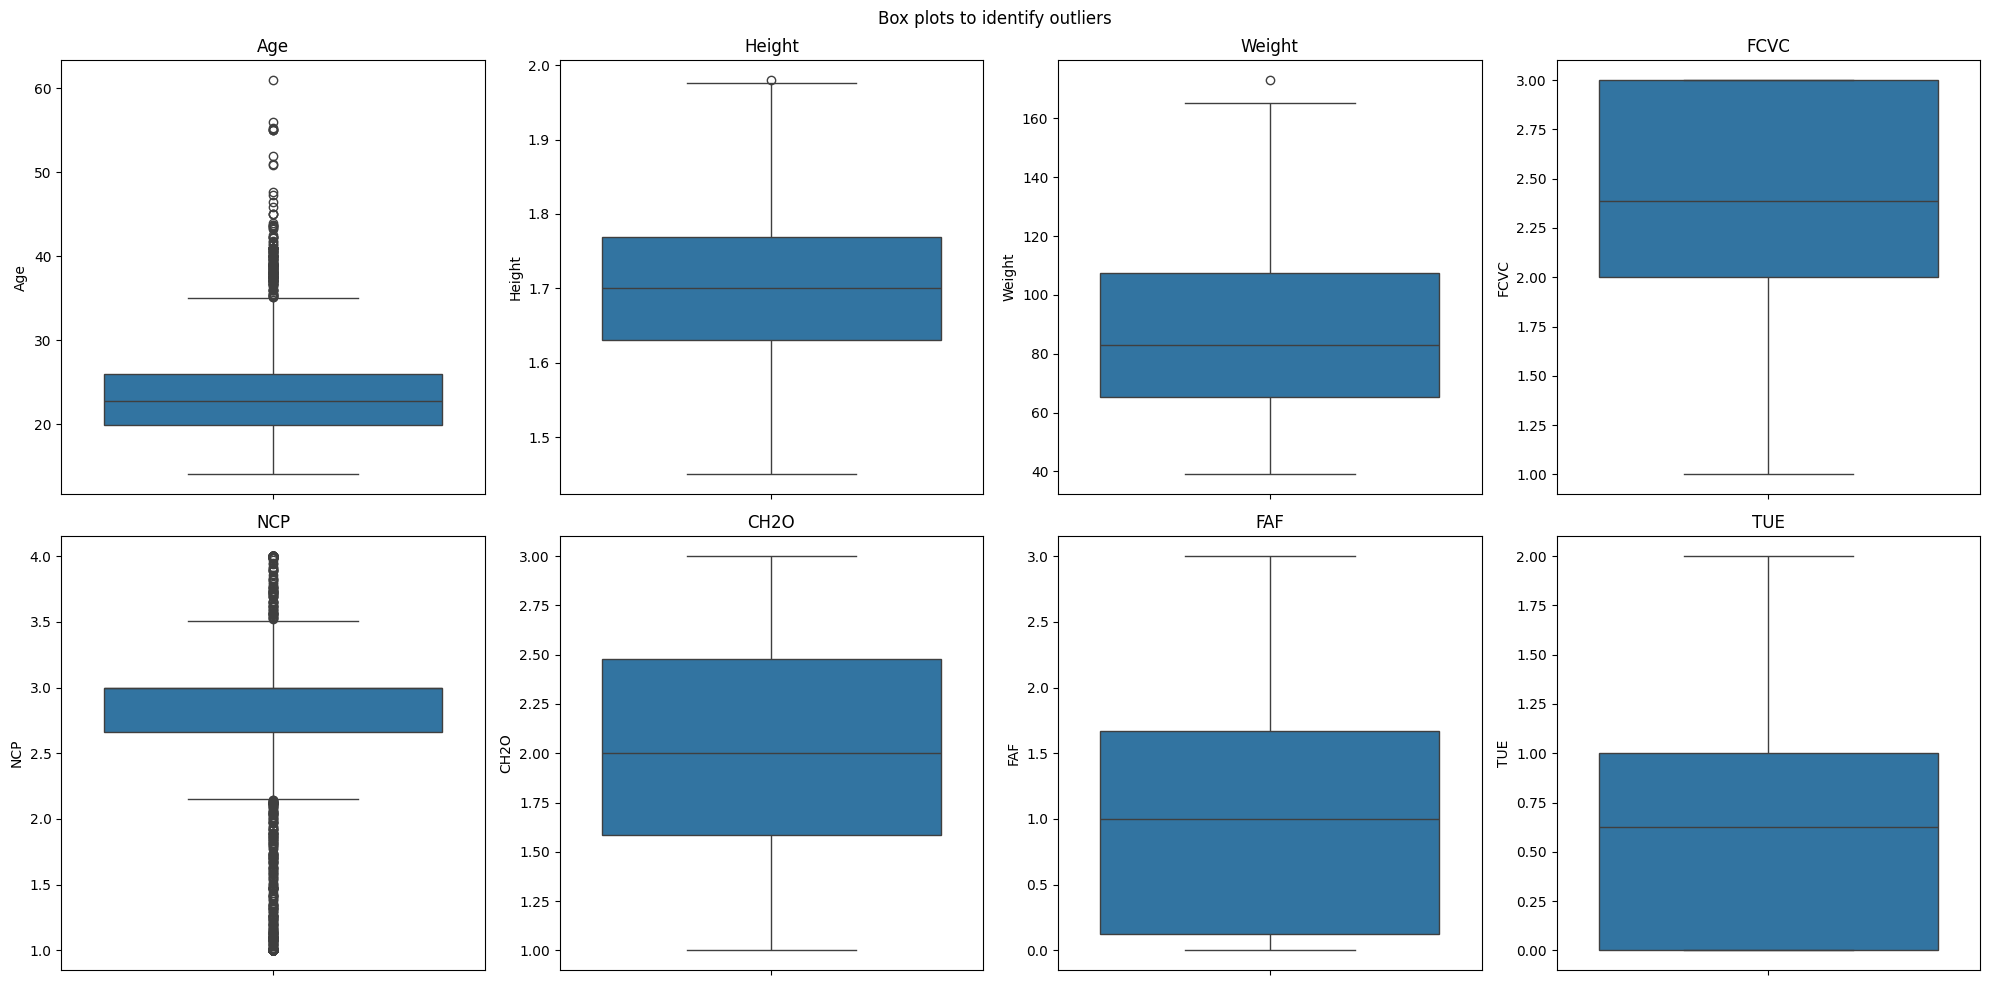

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_columns = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
fig.suptitle('Box plots to identify outliers')

for i, col in enumerate(numerical_columns):
    sns.boxplot(y=df[col], ax=axes[i//4, i%4])
    axes[i//4, i%4].set_title(col)

plt.tight_layout()
plt.show()

## Removing Duplicates

In [9]:
# 1. Remove Duplicate Rows
df_cleaned = df.drop_duplicates()

# Display the shape of the dataset before and after removing duplicates
original_shape = df.shape
cleaned_shape = df_cleaned.shape

original_shape, cleaned_shape


((2111, 17), (2087, 17))

# Detecting Outliers

In [10]:
# Function to detect outliers using IQR method
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Detect outliers in each numerical column
outliers = {col: detect_outliers(df_cleaned, col) for col in numerical_columns}

# Count of outliers in each column
outliers_count = {col: len(outliers[col]) for col in numerical_columns}

outliers_count


{'Age': 167,
 'Height': 1,
 'Weight': 1,
 'FCVC': 0,
 'NCP': 577,
 'CH2O': 0,
 'FAF': 0,
 'TUE': 0}

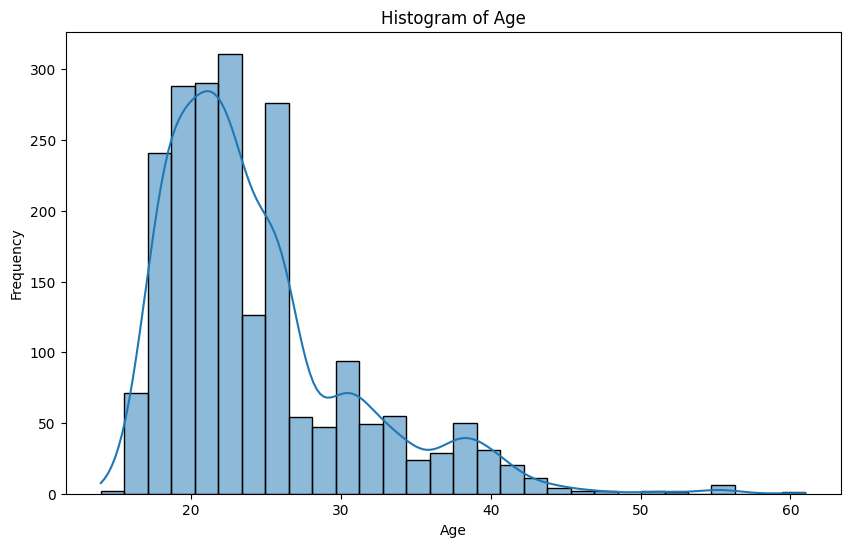

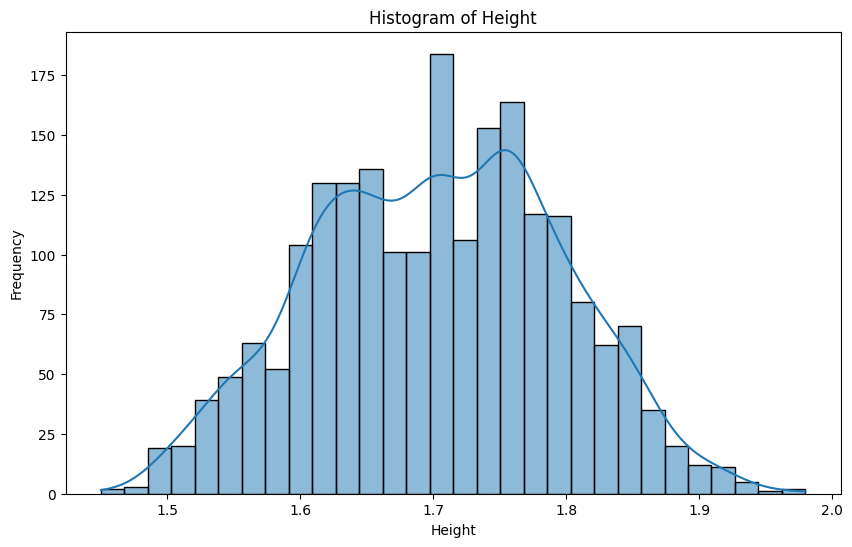

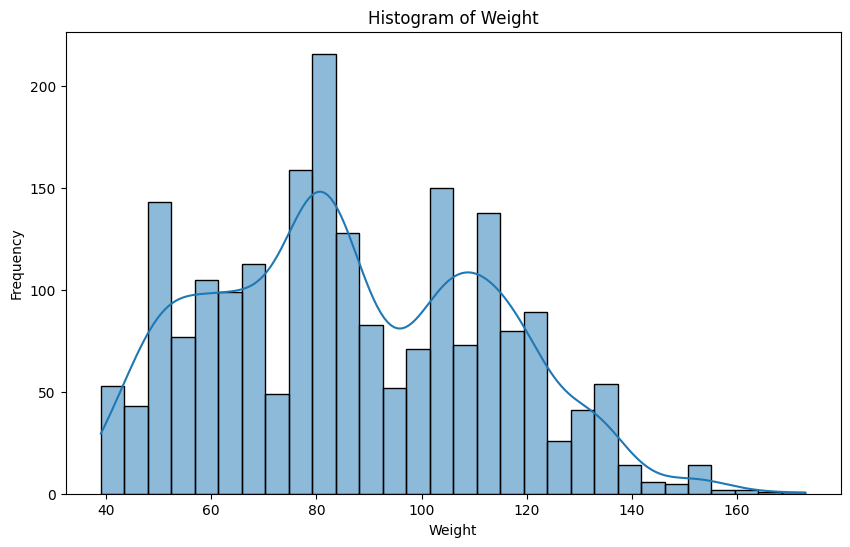

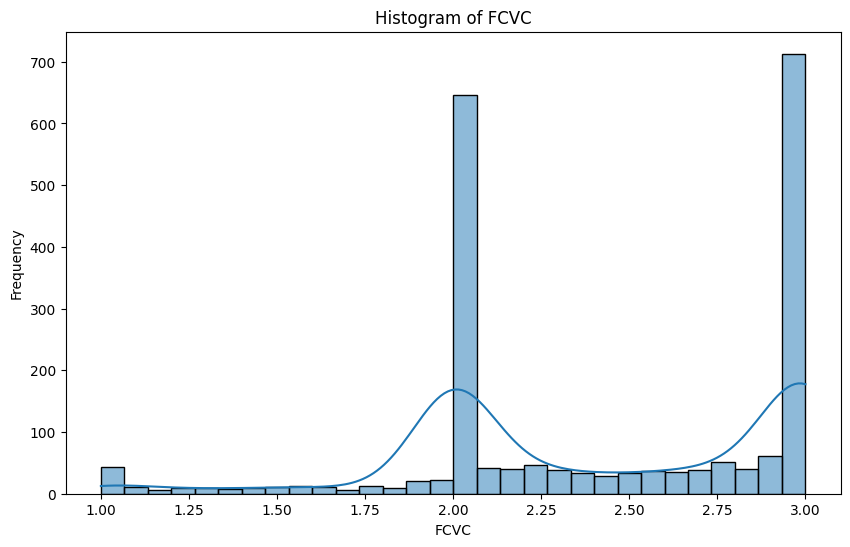

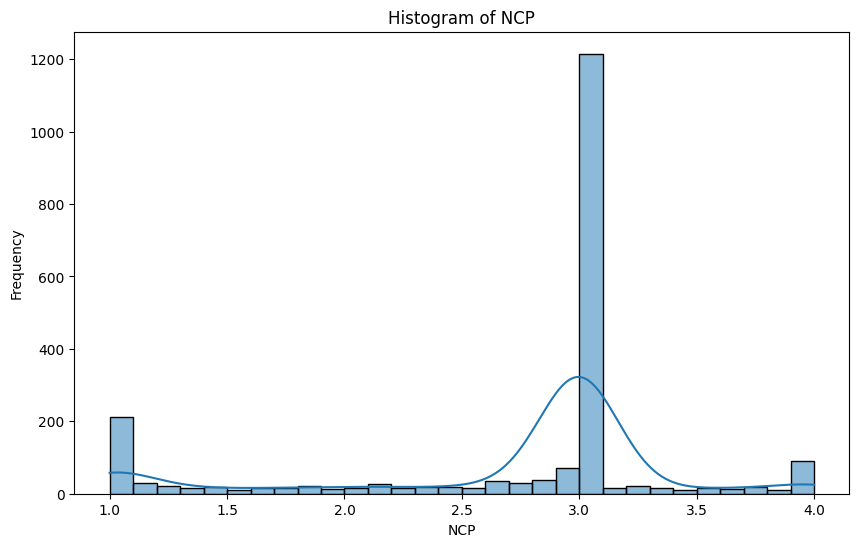

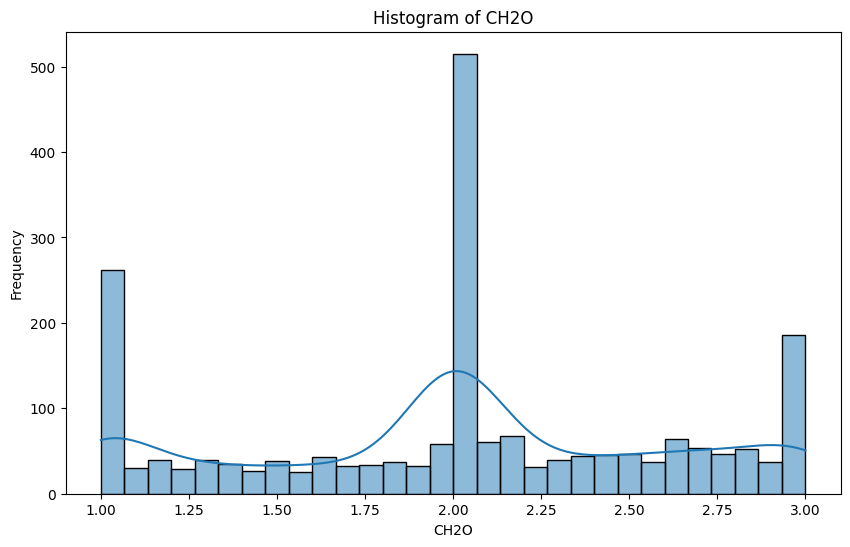

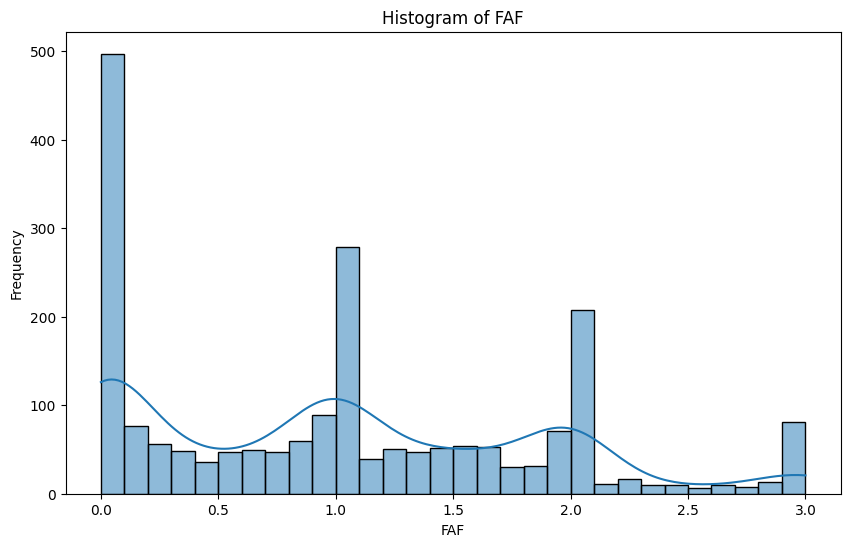

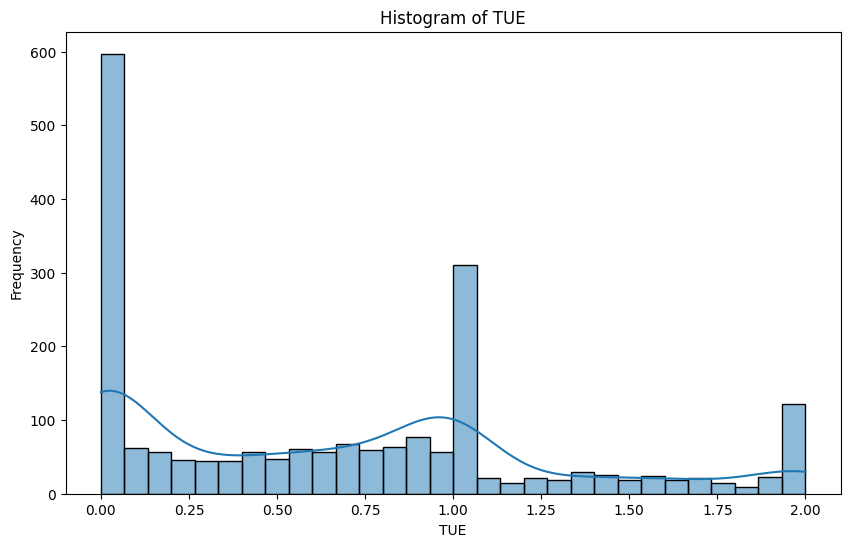

In [12]:
# Plotting Histograms for Numerical Features one by one
for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_cleaned[col], bins=30, kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

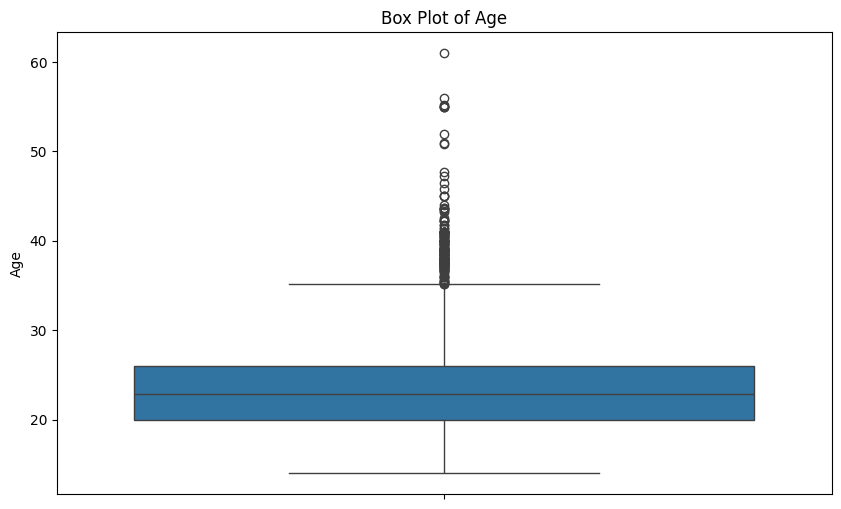

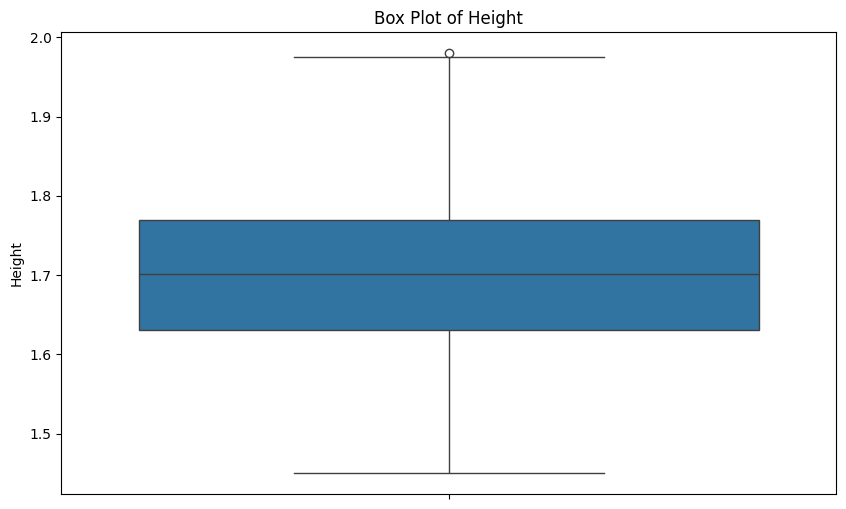

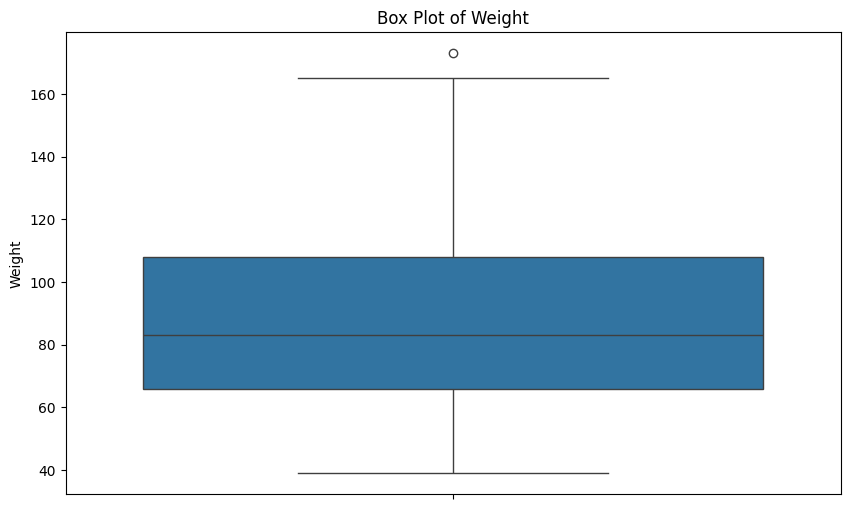

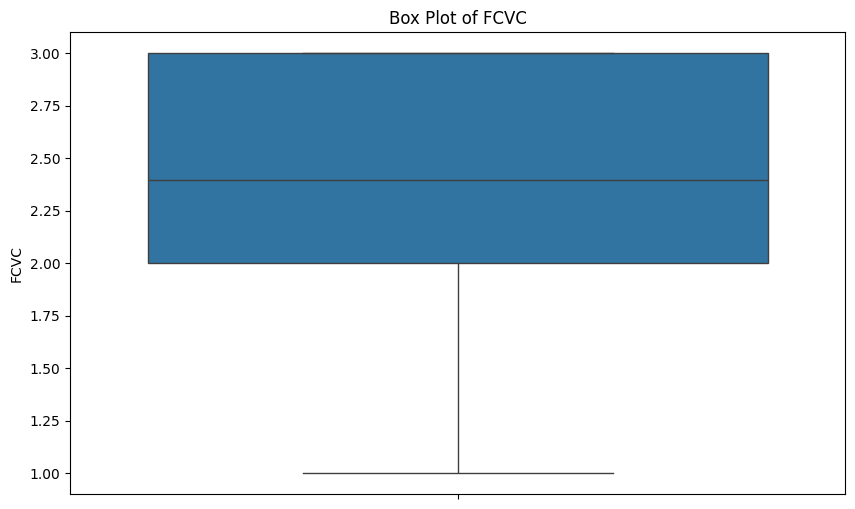

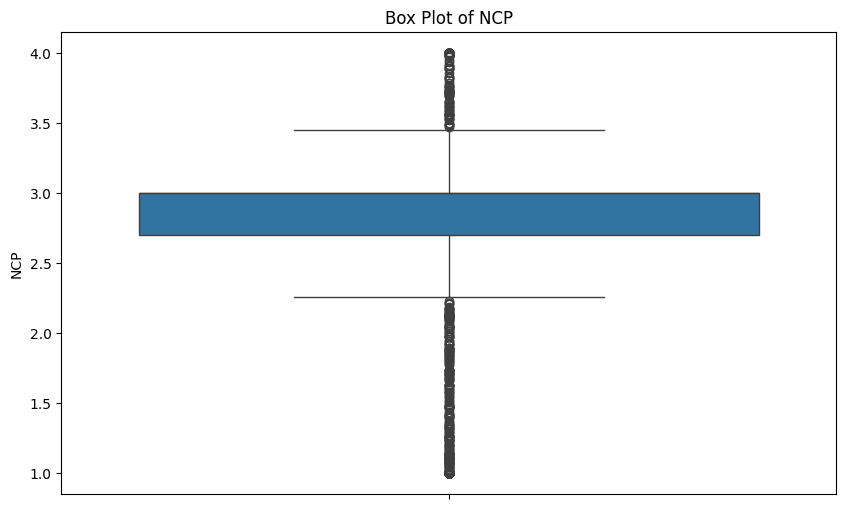

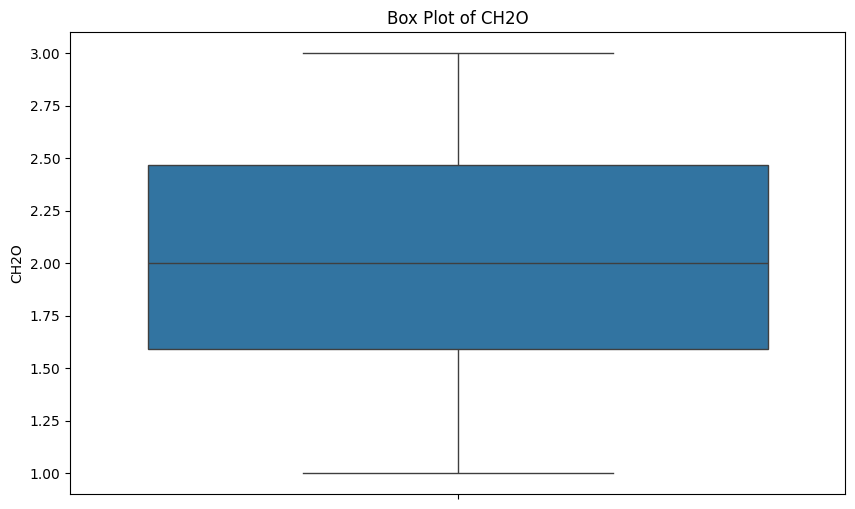

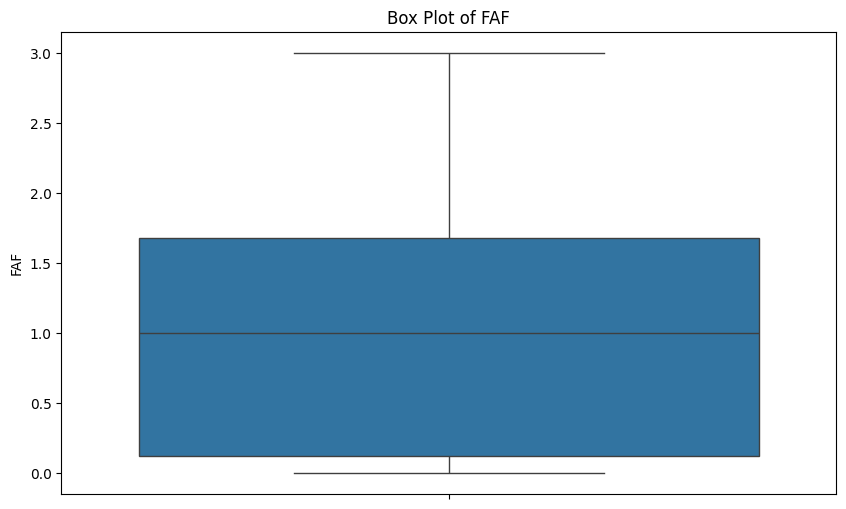

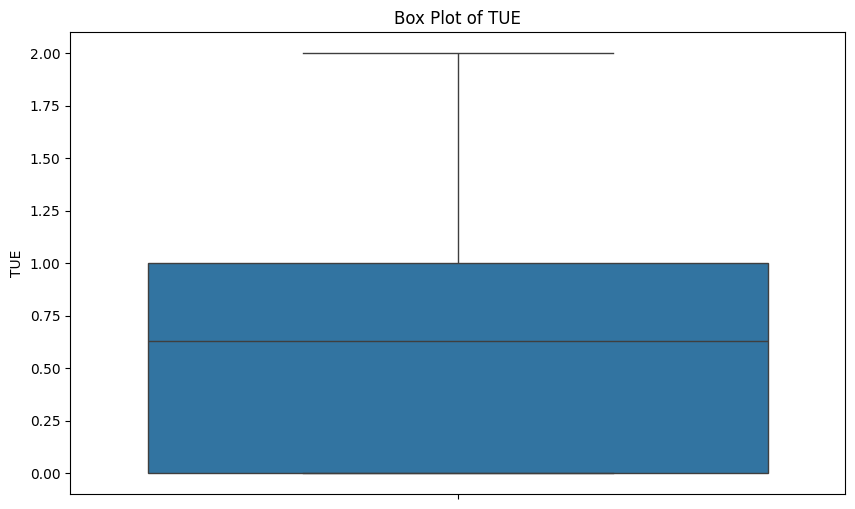

In [13]:
# Plotting Box Plots for Numerical Features one by one
for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=df_cleaned[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
    plt.show()



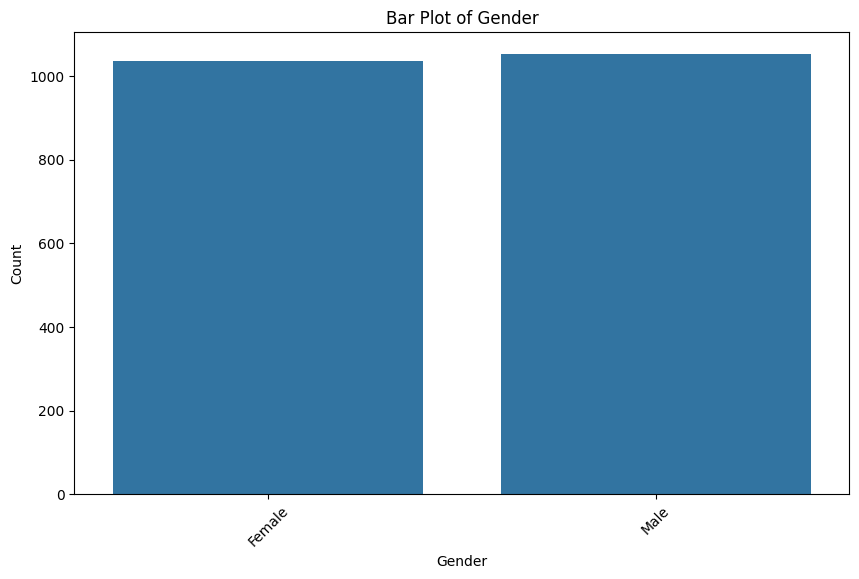

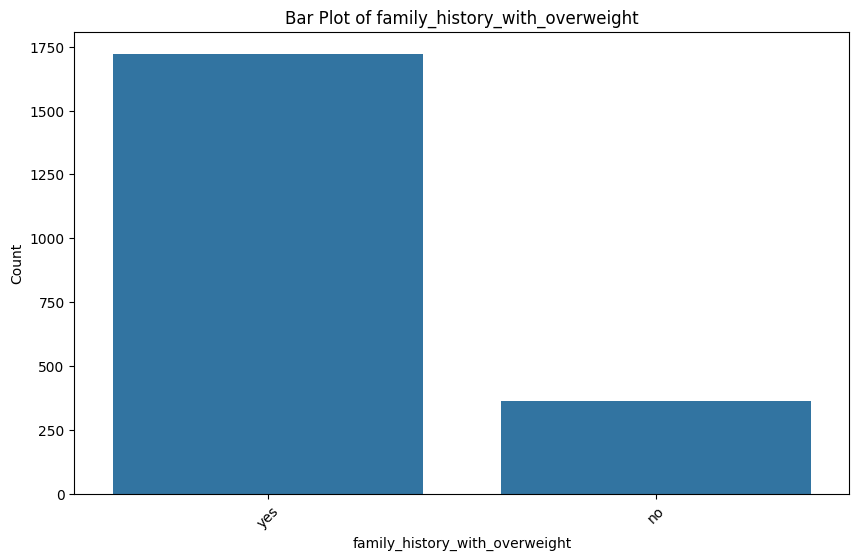

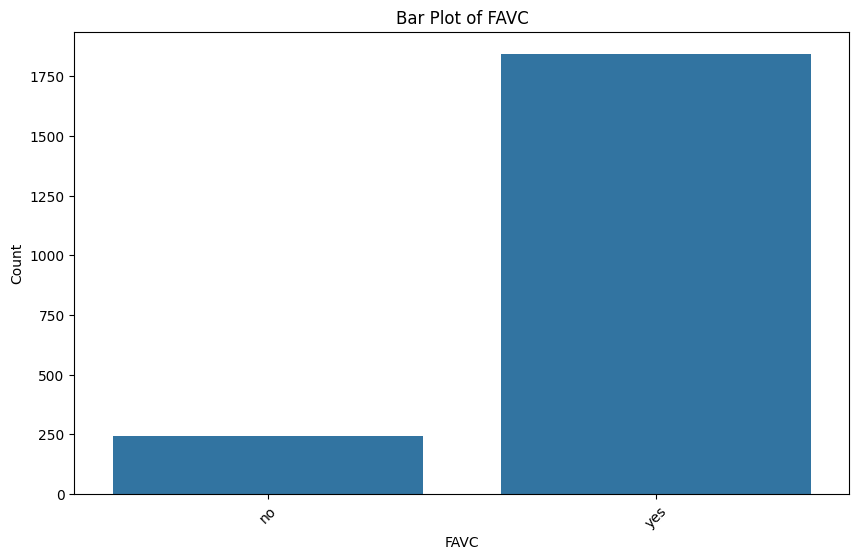

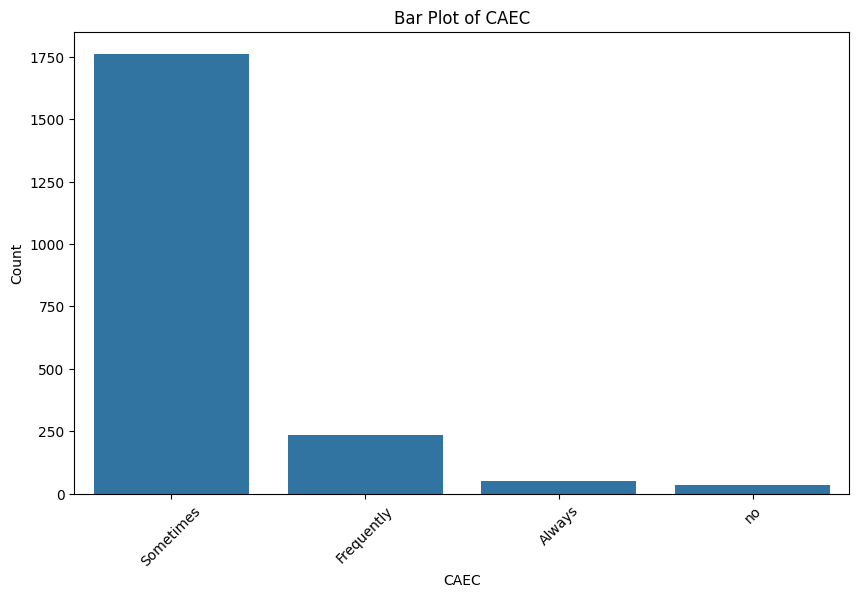

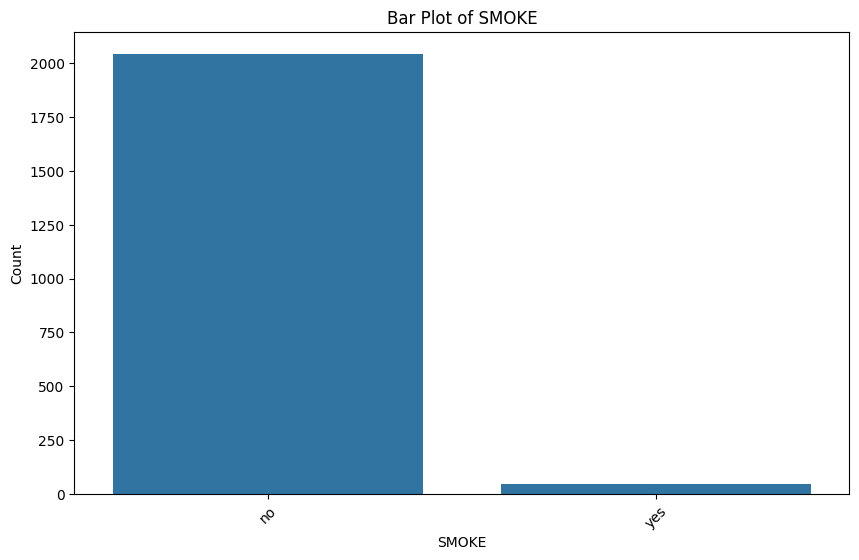

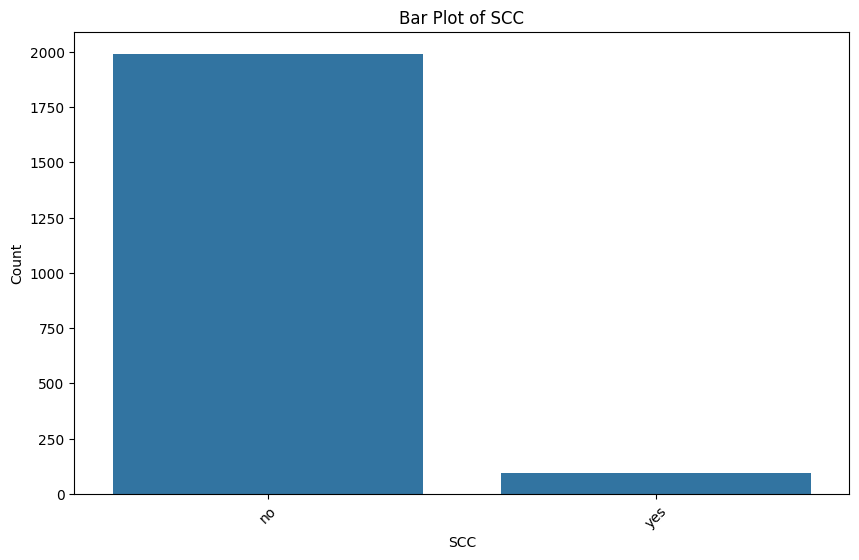

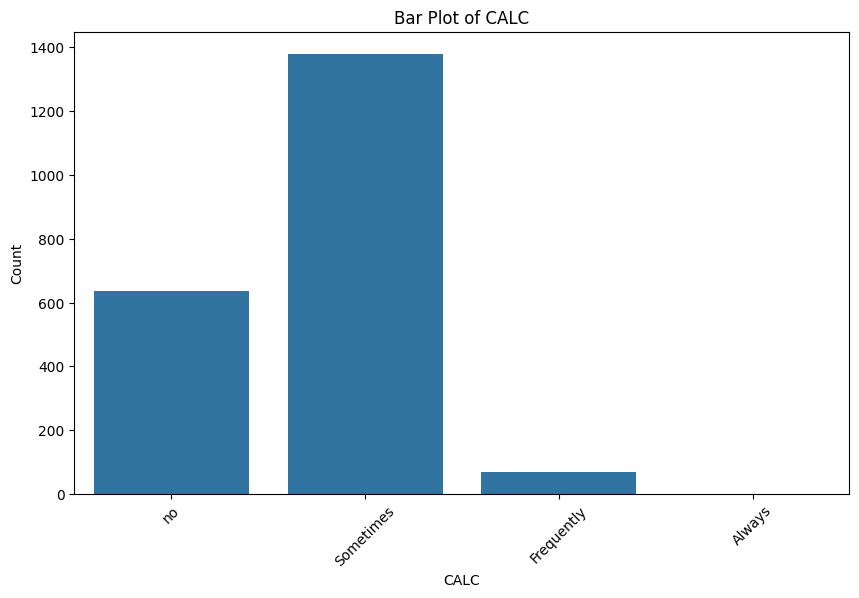

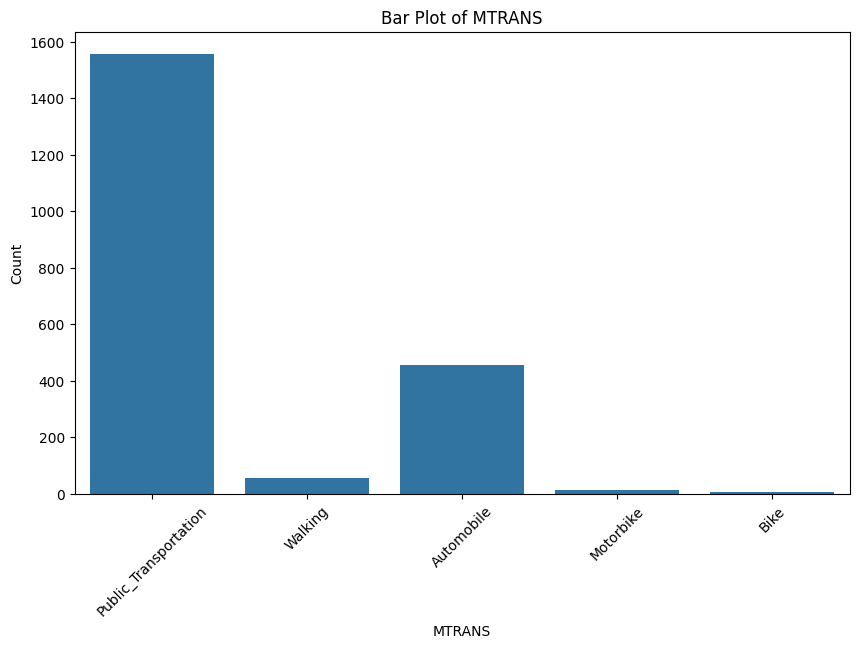

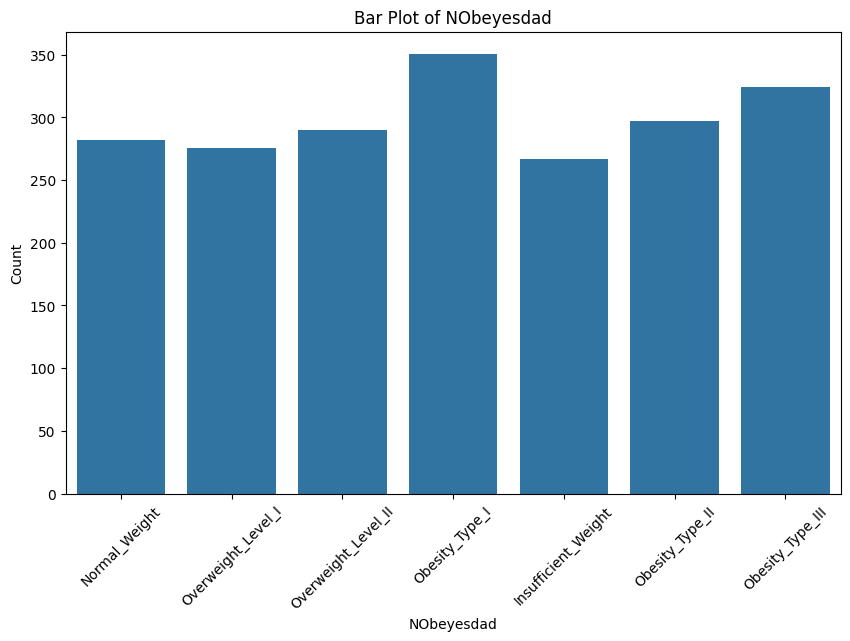

In [19]:
# Plotting Bar Plots for Categorical Features one by one
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=df_cleaned[col])
    plt.title(f'Bar Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

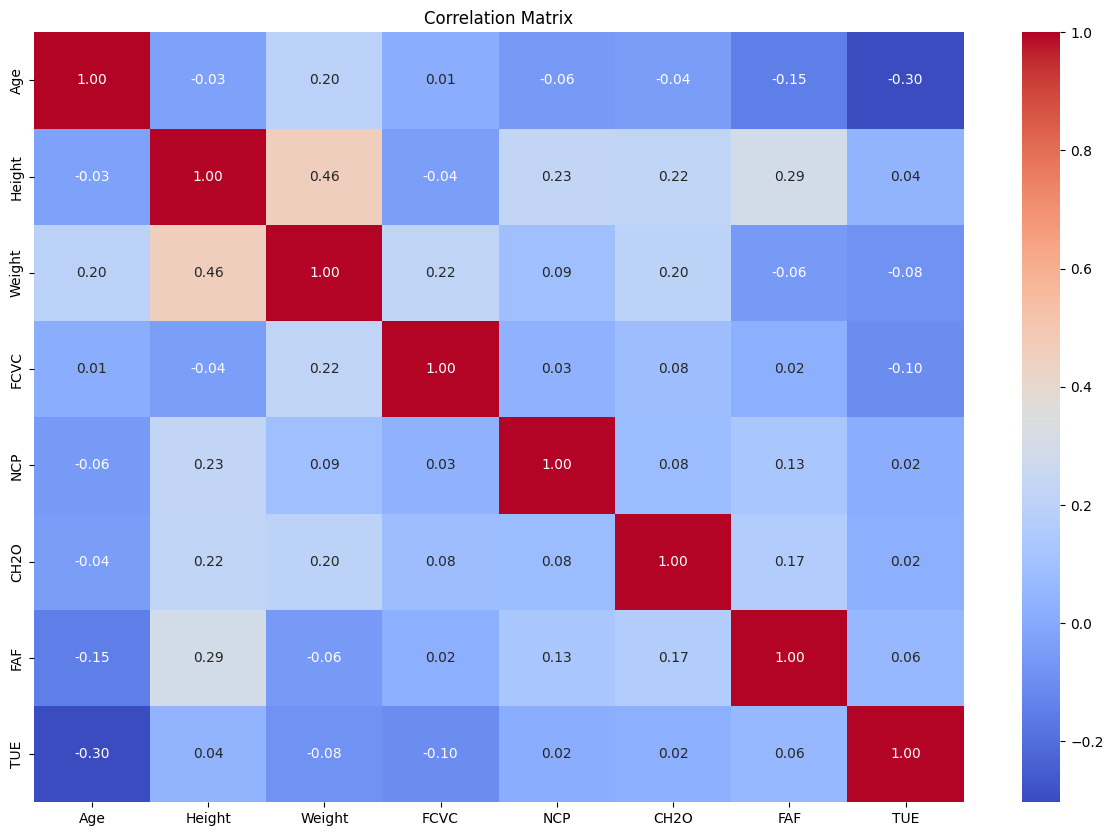

In [22]:
# Calculate correlation matrix only for numerical columns
numerical_columns = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
corr_matrix = df_cleaned[numerical_columns].corr()

# Plot the correlation matrix heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


# Detailed Exploratory Data Analysis (EDA)
# Numerical Features - Histograms
The histograms show the distribution of numerical features in the dataset:

Age: The distribution is slightly right-skewed, with most values clustered between 20 and 30.

Height: The distribution is fairly normal, centered around 1.70 meters.

Weight: The distribution is right-skewed, indicating some higher weights.

FCVC (Frequent consumption of vegetables): Most values are clustered around 2 and 3.

NCP (Number of main meals): The distribution shows some variation, but values of 2 and 3 are most common.

CH2O (Daily water consumption): Most values are around 2 and 3.

FAF (Physical activity frequency): Most values are low, indicating less frequent physical activity.

TUE (Time of using technology devices): The distribution is right-skewed, with most values being low.

## Numerical Features - Box Plots
The box plots highlight potential outliers:

Age: Outliers present, especially towards higher ages.

Height: Few outliers.

Weight: Significant outliers on the higher end.

NCP: Some outliers, particularly at higher values.

## Categorical Features - Bar Plots
The bar plots show the distribution of categorical features:

Gender: Balanced distribution between male and female.

Family History with Overweight: Predominantly 'yes'.

FAVC (Frequent consumption of high-caloric food): More 'no' responses.

CAEC (Consumption of food between meals): Most common response is 'Sometimes'.

SMOKE: Predominantly 'no'.

SCC (Calories consumption monitoring): Predominantly 'no'.

CALC (Consumption of alcohol): Most common response is 'Sometimes'.

MTRANS (Transportation used): Most common mode is 'Public_Transportation'.

NObeyesdad (Obesity level): Various levels, with 'Normal_Weight' and 'Overweight_Level_I' being common.

## Correlation Matrix
The correlation matrix shows relationships between numerical features:

Height and Weight: Expected positive correlation.

Age and TUE (Time of using technology devices): Shows some correlation.

## Summary
These visualizations and analyses provide a detailed understanding of the dataset, highlighting key distributions, potential outliers, and relationships between features.

# Feature Engineering

In [23]:
df_cleaned['BMI'] = df_cleaned['Weight'] / (df_cleaned['Height'] ** 2)


/tmp/ipykernel_7700/3462105017.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['BMI'] = df_cleaned['Weight'] / (df_cleaned['Height'] ** 2)


In [24]:
# Create Age Group
df_cleaned['Age_Group'] = pd.cut(df_cleaned['Age'], bins=[0, 18, 35, 50, 100], labels=['Teen', 'Young Adult', 'Adult', 'Senior'])

# Display the first few rows to verify the new Age_Group column
df_cleaned[['Age', 'Age_Group','BMI']].head()

/tmp/ipykernel_7700/536375728.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Age_Group'] = pd.cut(df_cleaned['Age'], bins=[0, 18, 35, 50, 100], labels=['Teen', 'Young Adult', 'Adult', 'Senior'])


,Age,Age_Group,BMI
0,21.0,Young Adult,24.386526
1,21.0,Young Adult,24.238227
2,23.0,Young Adult,23.765432
3,27.0,Young Adult,26.851852
4,22.0,Young Adult,28.342381


In [31]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode the target variable
le = LabelEncoder()
df_cleaned['NObeyesdad_encoded'] = le.fit_transform(df_cleaned['NObeyesdad'])


/tmp/ipykernel_7700/1237165253.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['NObeyesdad_encoded'] = le.fit_transform(df_cleaned['NObeyesdad'])


In [32]:
# Calculate correlation coefficients only for numerical features
numerical_columns = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'BMI']
correlation_matrix = df_cleaned[numerical_columns + ['NObeyesdad_encoded']].corr()
correlation_with_target = correlation_matrix['NObeyesdad_encoded'].sort_values(ascending=False)


In [33]:
# Encode categorical variables
df_encoded = df_cleaned.copy()
for col in categorical_columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Prepare data for chi-square test
X_categorical = df_encoded[categorical_columns]
y = df_encoded['NObeyesdad_encoded']

# Perform chi-square test
chi_scores = chi2(X_categorical, y)
chi2_scores = pd.Series(chi_scores[0], index=categorical_columns)
chi2_p_values = pd.Series(chi_scores[1], index=categorical_columns)

chi2_scores.sort_values(ascending=False), chi2_p_values.sort_values(ascending=False)


(NObeyesdad                        2627.267525
 Gender                             326.048793
 SCC                                122.141584
 family_history_with_overweight     108.032828
 MTRANS                             102.958698
 CAEC                                43.428307
 SMOKE                               31.183130
 FAVC                                26.928662
 CALC                                21.650238
 dtype: float64,
 CALC                              1.400833e-03
 FAVC                              1.493320e-04
 SMOKE                             2.338777e-05
 CAEC                              9.595485e-08
 MTRANS                            6.052116e-20
 family_history_with_overweight    5.260990e-21
 SCC                               5.782949e-24
 Gender                            2.129154e-67
 NObeyesdad                        0.000000e+00
 dtype: float64)

In [34]:
# Calculate correlation coefficients only for numerical features
numerical_columns = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'BMI']
correlation_matrix = df_cleaned[numerical_columns + ['NObeyesdad_encoded']].corr()
correlation_with_target = correlation_matrix['NObeyesdad_encoded'].sort_values(ascending=False)
correlation_with_target


NObeyesdad_encoded    1.000000
BMI                   0.429668
Weight                0.388802
Age                   0.238308
CH2O                  0.092616
Height                0.038700
FCVC                  0.025728
TUE                  -0.064876
NCP                  -0.088235
FAF                  -0.135192
Name: NObeyesdad_encoded, dtype: float64

## Selected Features for Classification
Based on the correlation coefficients and chi-square test results, the selected features are:

### Numerical Features:
BMI

Weight

Age

CH2O

### Categorical Features:

Gender

SCC

Family History with Overweight

MTRANS

CAEC

SMOKE


FAVC


CALC

In [35]:
selected_features = [
    'BMI', 'Weight', 'Age', 'CH2O',
    'Gender', 'SCC', 'family_history_with_overweight',
    'MTRANS', 'CAEC', 'SMOKE', 'FAVC', 'CALC'
]


In [36]:
# Select the features from the dataset
df_selected = df_cleaned[selected_features + ['NObeyesdad']]

# Display the first few rows of the selected data
df_selected.head()


,BMI,Weight,Age,CH2O,Gender,SCC,family_history_with_overweight,MTRANS,CAEC,SMOKE,FAVC,CALC,NObeyesdad
0,24.386526,64.0,21.0,2.0,Female,no,yes,Public_Transportation,Sometimes,no,no,no,Normal_Weight
1,24.238227,56.0,21.0,3.0,Female,yes,yes,Public_Transportation,Sometimes,yes,no,Sometimes,Normal_Weight
2,23.765432,77.0,23.0,2.0,Male,no,yes,Public_Transportation,Sometimes,no,no,Frequently,Normal_Weight
3,26.851852,87.0,27.0,2.0,Male,no,no,Walking,Sometimes,no,no,Frequently,Overweight_Level_I
4,28.342381,89.8,22.0,2.0,Male,no,no,Public_Transportation,Sometimes,no,no,Sometimes,Overweight_Level_II


In [42]:
from sklearn.preprocessing import StandardScaler

# Separate numerical and categorical features
numerical_features = ['BMI', 'Weight', 'Age', 'CH2O']
categorical_features = ['Gender', 'SCC', 'family_history_with_overweight', 'MTRANS', 'CAEC', 'SMOKE', 'FAVC', 'CALC']

# Scale numerical features
scaler = StandardScaler()
df_selected[numerical_features] = scaler.fit_transform(df_selected[numerical_features])

# Display the first few rows of scaled numerical features
df_selected[numerical_features].head()
df_selected[numerical_features].shape


/tmp/ipykernel_7700/3857182565.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected[numerical_features] = scaler.fit_transform(df_selected[numerical_features])


(2087, 4)

In [44]:
from sklearn.preprocessing import OneHotEncoder

# Encode categorical features
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_categorical = encoder.fit_transform(df_selected[categorical_features])

# Get feature names for the encoded categorical features
encoded_feature_names = encoder.get_feature_names_out(categorical_features)

# Convert encoded categorical features to DataFrame
encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=encoded_feature_names)

# Display the shape of encoded categorical features and the first few rows
encoded_categorical_df.shape, encoded_categorical_df.head()


((2087, 15),
    Gender_Male  SCC_yes  family_history_with_overweight_yes  MTRANS_Bike  \
 0          0.0      0.0                                 1.0          0.0   
 1          0.0      1.0                                 1.0          0.0   
 2          1.0      0.0                                 1.0          0.0   
 3          1.0      0.0                                 0.0          0.0   
 4          1.0      0.0                                 0.0          0.0   
 
    MTRANS_Motorbike  MTRANS_Public_Transportation  MTRANS_Walking  \
 0               0.0                           1.0             0.0   
 1               0.0                           1.0             0.0   
 2               0.0                           1.0             0.0   
 3               0.0                           0.0             1.0   
 4               0.0                           1.0             0.0   
 
    CAEC_Frequently  CAEC_Sometimes  CAEC_no  SMOKE_yes  FAVC_yes  \
 0              0.0             

In [46]:
from sklearn.preprocessing import LabelEncoder

# Encode the target variable
label_encoder = LabelEncoder()
df_selected['NObeyesdad_encoded'] = label_encoder.fit_transform(df_selected['NObeyesdad'])

# Combine scaled numerical features and encoded categorical features
df_preprocessed = pd.concat([df_selected[numerical_features], encoded_categorical_df], axis=1)
df_preprocessed['NObeyesdad_encoded'] = df_selected['NObeyesdad_encoded']

# Display the shape of the preprocessed data and the first few rows
df_preprocessed.shape, df_preprocessed.head()


/tmp/ipykernel_7700/3247863022.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['NObeyesdad_encoded'] = label_encoder.fit_transform(df_selected['NObeyesdad'])


((2111, 20),
         BMI    Weight       Age      CH2O  Gender_Male  SCC_yes  \
 0 -0.670475 -0.872985 -0.526613 -0.007810          0.0      0.0   
 1 -0.688960 -1.178508 -0.526613  1.636552          0.0      1.0   
 2 -0.747890 -0.376509 -0.212507 -0.007810          1.0      0.0   
 3 -0.363194  0.005395  0.415705 -0.007810          1.0      0.0   
 4 -0.177412  0.112328 -0.369560 -0.007810          1.0      0.0   
 
    family_history_with_overweight_yes  MTRANS_Bike  MTRANS_Motorbike  \
 0                                 1.0          0.0               0.0   
 1                                 1.0          0.0               0.0   
 2                                 1.0          0.0               0.0   
 3                                 0.0          0.0               0.0   
 4                                 0.0          0.0               0.0   
 
    MTRANS_Public_Transportation  MTRANS_Walking  CAEC_Frequently  \
 0                           1.0             0.0              0.0   